In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import ast

nltk.download('vader_lexicon')

In [92]:
male_adjectives = pd.read_csv("data/male_adjectives_modif.csv", sep = '\t', names=["year", "adjective"])
female_adjectives = pd.read_csv("data/female_adjectives_modif.csv", sep = '\t', names=["year", "adjective"])

female_adjectives = female_adjectives[female_adjectives['adjective'].apply(lambda x: len(x) > 2)]
male_adjectives = male_adjectives[male_adjectives['adjective'].apply(lambda x: len(x) > 2)]

In [93]:
male_adj_counts = male_adjectives['adjective'].value_counts()
female_adj_counts = female_adjectives['adjective'].value_counts()


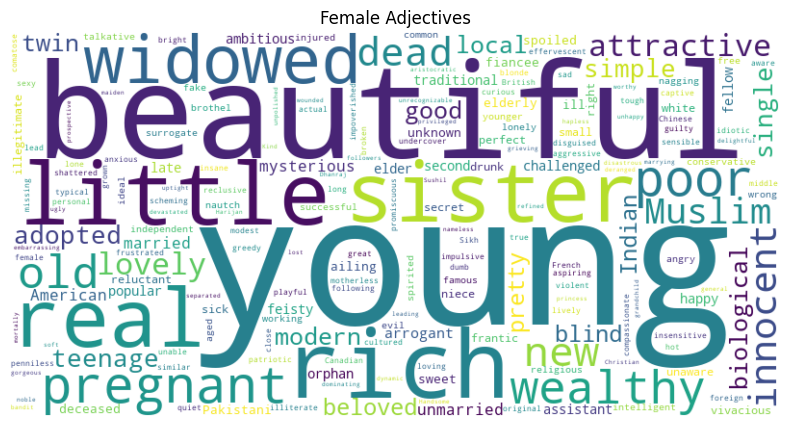

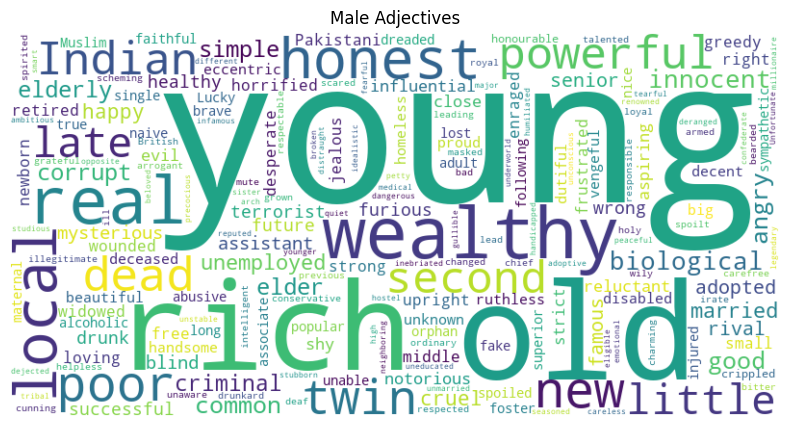

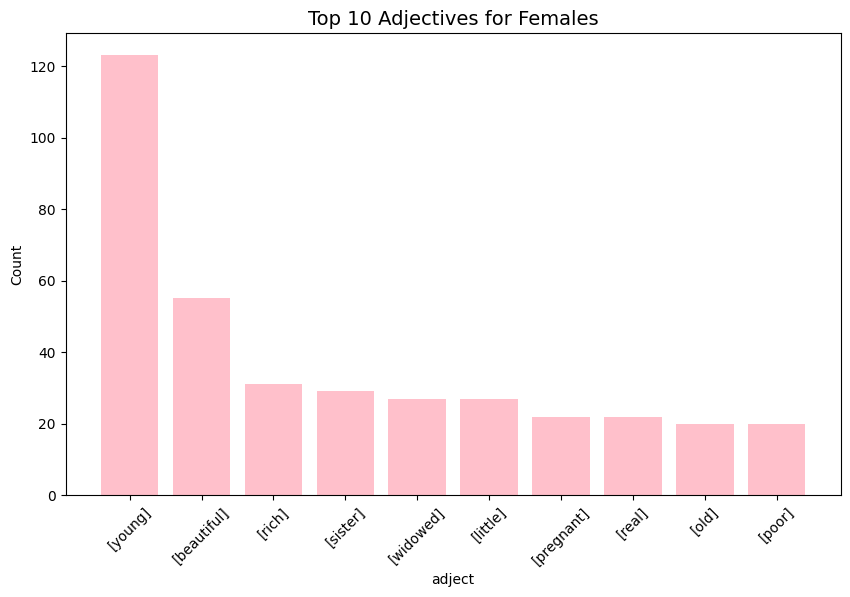

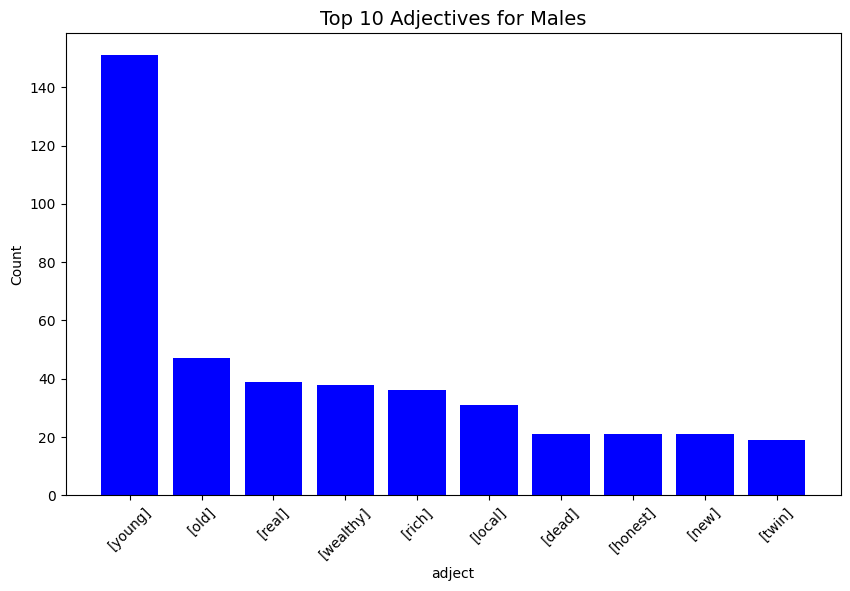

In [94]:
sia = SentimentIntensityAnalyzer()
male_adjectives['sentiment'] = male_adjectives['adjective'].apply(lambda x: sia.polarity_scores(x)['compound'])
female_adjectives['sentiment'] = female_adjectives['adjective'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Convert counts to DataFrame for easier comparison
female_adj_df = pd.DataFrame(female_adj_counts.items(), columns=['adjective', 'Count']).sort_values(by='Count', ascending=False)
male_adj_df = pd.DataFrame(male_adj_counts.items(), columns=['adjective', 'Count']).sort_values(by='Count', ascending=False)

# Plot word clouds
def plot_wordcloud(data, title, filename):
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(data))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.savefig(filename)
    plt.show()

plot_wordcloud(female_adjectives['adjective'], "Female Adjectives", 'female_adj_wordcloud.png')
plot_wordcloud(male_adjectives['adjective'], "Male Adjectives",'male_adj_wordcloud.png')

# Visualize with Bar Plots
def plot_top_verbs(data, title, gender_color, filename):
    top_verbs = data.head(10)
    plt.figure(figsize=(10, 6))
    plt.bar(top_verbs['adjective'], top_verbs['Count'], color=gender_color)
    plt.xlabel('adject')
    plt.ylabel('Count')
    plt.title(title, fontsize=14)
    plt.xticks(rotation=45)
    plt.savefig(filename)
    plt.show()

plot_top_verbs(female_adj_df, "Top 10 Adjectives for Females", 'pink', 'female_adj_barplot.png')
plot_top_verbs(male_adj_df, "Top 10 Adjectives for Males", 'blue','male_adj_barplot.png')


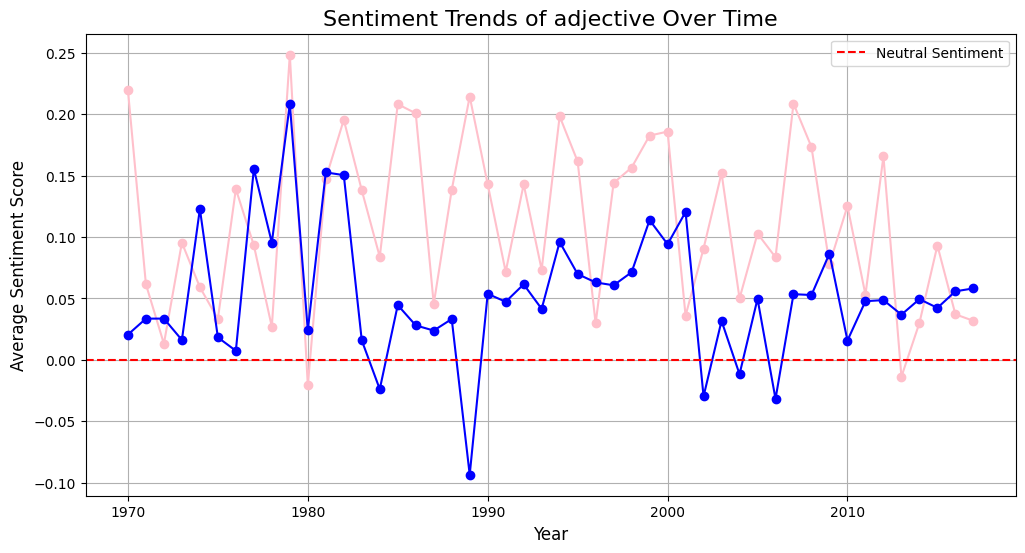

In [95]:
import ast
from textblob import TextBlob

# Convert adjective column to Python lists
# female_data['adjective'] = female_data['adjective'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.strip() else [])

# Expand the adjectives into individual rows
expanded_dataF = female_adjectives.explode('adjective').dropna().reset_index(drop=True)
expanded_dataM = male_adjectives.explode('adjective').dropna().reset_index(drop=True)


# Perform Sentiment Analysis
def get_sentiment(adjective):
    analysis = TextBlob(adjective)
    return analysis.sentiment.polarity  # Returns a score between -1 (negative) and +1 (positive)

expanded_dataF['Sentiment'] = expanded_dataF['adjective'].apply(get_sentiment)
expanded_dataM['Sentiment'] = expanded_dataM['adjective'].apply(get_sentiment)

# Aggregate sentiment by year
sentiment_by_yearF = expanded_dataF.groupby('year')['Sentiment'].mean().reset_index()
sentiment_by_yearM = expanded_dataM.groupby('year')['Sentiment'].mean().reset_index()

# Plot sentiment trends over time
plt.figure(figsize=(12, 6))
plt.plot(sentiment_by_yearF['year'], sentiment_by_yearF['Sentiment'], marker='o', color='pink')
plt.plot(sentiment_by_yearM['year'], sentiment_by_yearM['Sentiment'], marker='o', color='blue')
plt.title("Sentiment Trends of adjective Over Time", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Sentiment Score", fontsize=12)
plt.axhline(0, color='red', linestyle='--', label="Neutral Sentiment")
plt.legend()
plt.grid(True)
plt.savefig('adj_sentiment.png')
plt.show()